<font size="5"><b><center> Heart failure prediction ❤🚑🏥</center></b></font>

<center><img src="https://media.giphy.com/media/yeUxljCJjH1rW/giphy.gif" style="width:480px;height:280px;"></center>


## 🔺Introduction

<font size="4">In this modern era people are very busy and working hard in order to satisfying their materialistic needs and not able to spend time for themselves which leads to physical stress and mental disorder. There are also reports that heart suffer because of global pandemic corona virus. Inflammation of the heart muscle can be caused by corona virus. Thus heart disease is very common now a day’s particularly in urban areas because of excess mental stress due to corona virus. As a result Heart disease has become one of the most important factors for death of men and women in the so called material world (Sahoo,2020). </font>

<font size="4">Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. Both linear and machine learning models are used to predict heart failure based on various data as inputs. </font>

## 🎯Objectives

<font size="4">People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. hence the main objective is <span style="color:red;">to predict if some one is at high risk of being diagnoised as a heart patient.</span></font>

<font size="4">When a person has risk factors, their doctor can refer them to a cardiologist for further testing. These tests include a coronary calcium scan(CT) scan that takes pictures of the arteries to check for calcified plaque in the arteries, and a CT angiogram, which uses X-rays to provide detailed pictures of the heart and the blood vessels to look for disease. source: <a href="https://www.montefiorenyack.org/highland/press/early-detection-of-heart-disease-can-keep-you-healthy">click here</a> </font>

## 🩺Description of the dataset

<font size="4">This dataset has created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes.</font>

<font size="4">Here's a brief version of the data description file.</font>

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

### ✨Importing the dataset

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-failure-prediction/heart.csv


In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.shape

(918, 12)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 👨‍⚕️ Main findings of descriptive analysis

<AxesSubplot:>

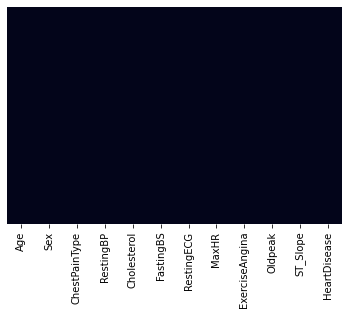

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<font size="4"> There are no missing values in this dataset. </font>

In [8]:
categorical_cols= df.select_dtypes(include=['object'])
print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')
for cols in categorical_cols.columns:
    print(cols,':', len(categorical_cols[cols].unique()),'labels')

The dataset contains 5 categorical columns
Sex : 2 labels
ChestPainType : 4 labels
RestingECG : 3 labels
ExerciseAngina : 2 labels
ST_Slope : 3 labels


In [9]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2,random_state= 1234)

In [10]:
import plotly.graph_objects as go


labels = [x for x in train.ChestPainType.value_counts().index]
values = train.ChestPainType.value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.06, 0])])

fig.update_layout(
    title_text="Chest pain type ")
fig.show()

In [11]:
import plotly.figure_factory as ff
from plotly.offline import iplot
fig = ff.create_distplot([train.Age],['Age'],bin_size=1)
iplot(fig, filename='Basic Distplot')

In [12]:
# Add histogram data
x1 = train["RestingBP"]
x2 = train["Cholesterol"]
x3 = train["MaxHR"]

# Group data together
hist_data = [x1, x2, x3]

group_labels = ['RestingBP', 'Cholesterol', 'MaxHR']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=10)
fig.show()

In [13]:
trace0 = go.Box(y=train["Age"],name="Age")
trace1 = go.Box(y=train["RestingBP"],name="RestingBP")
trace2 = go.Box(y=train["Cholesterol"],name="Cholesterol")
trace3 = go.Box(y=train["MaxHR"],name="MaxHR")
data = [trace0, trace1, trace2,trace3]
iplot(data)

In [14]:
# prepare data
data = train.loc[:,['RestingBP', 'Cholesterol', 'MaxHR']]
data["index"] = np.arange(1,len(data)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data, diag='box', index='index',colormap='Portland',
                                  height=700, width=700)
iplot(fig)

In [15]:
train['Sex'] = np.where(train['Sex'] == "F", 0, 1)
train['ExerciseAngina'] = np.where(train['ExerciseAngina'] == "N", 0, 1)
test['Sex'] = np.where(test['Sex'] == "F", 0, 1)
test['ExerciseAngina'] = np.where(test['ExerciseAngina'] == "N", 0, 1)

In [16]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
126,34,0,ATA,130,161,0,Normal,190,0,0.0,Up,0
58,54,1,ASY,150,365,0,ST,134,0,1.0,Up,0
489,54,1,ASY,136,220,0,Normal,140,1,3.0,Flat,1
369,63,1,ASY,150,0,0,Normal,86,1,2.0,Flat,1
192,48,1,ATA,130,245,0,Normal,160,0,0.0,Up,0


In [17]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [18]:
train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
126,34,0,130,161,0,190,0,0.0,0,0,1,0,0,0,1,0,0,0,1
58,54,1,150,365,0,134,0,1.0,0,1,0,0,0,0,0,1,0,0,1
489,54,1,136,220,0,140,1,3.0,1,1,0,0,0,0,1,0,0,1,0
369,63,1,150,0,0,86,1,2.0,1,1,0,0,0,0,1,0,0,1,0
192,48,1,130,245,0,160,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [19]:
test.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
581,48,1,140,208,0,159,1,1.5,1,1,0,0,0,0,1,0,0,0,1
623,60,1,140,293,0,170,0,1.2,1,1,0,0,0,1,0,0,0,1,0
60,49,1,100,253,0,174,0,0.0,0,0,1,0,0,0,1,0,0,0,1
613,58,1,140,385,1,135,0,0.3,0,1,0,0,0,1,0,0,0,0,1
40,54,0,150,230,0,130,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [20]:
print(train.shape)
print(test.shape)

(734, 19)
(184, 19)


In [21]:
x_train=train.drop(['HeartDisease'],1)
x_test=test.drop(['HeartDisease'],1)

y_train=train['HeartDisease']
y_test=test['HeartDisease']

In [22]:
print(x_train.shape)
print(x_test.shape)

(734, 18)
(184, 18)


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

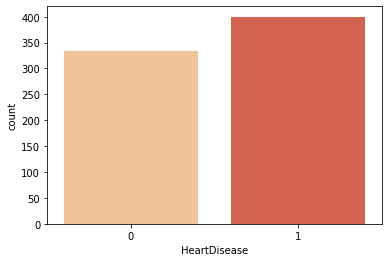

In [23]:
sns.countplot(y_train,palette='OrRd')

## 🩸 Model fitting

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

train accuracy: 0.8664850136239782 
 test accuracy: 0.8804347826086957


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        72
           1       0.92      0.88      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



confusion matrix for logistic regression


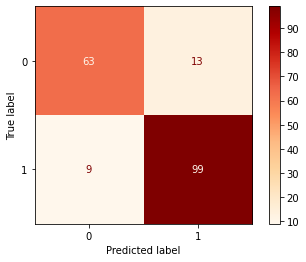

In [25]:
#logistic regression
lr = LogisticRegression(max_iter=20000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.8651226158038147 
 test accuracy: 0.8804347826086957


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        72
           1       0.92      0.88      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



confusion matrix for linear discriminant analysis


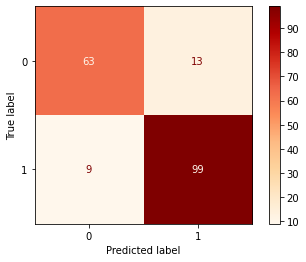

In [26]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

ldapred = lda.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(lda, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.7989130434782609


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.81      0.84      0.83       105

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



confusion matrix for decision tree classifier


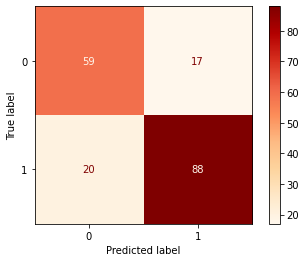

In [27]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.8641304347826086


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        69
           1       0.92      0.86      0.89       115

    accuracy                           0.86       184
   macro avg       0.85      0.87      0.86       184
weighted avg       0.87      0.86      0.87       184



confusion matrix for random forest classifier


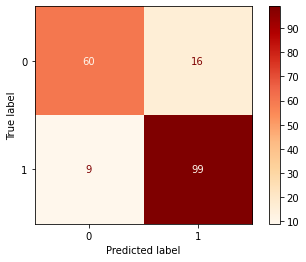

In [28]:
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.989100817438692 
 test accuracy: 0.8369565217391305


classification report for bagging classifier
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        74
           1       0.87      0.85      0.86       110

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



confusion matrix for bagging classifier


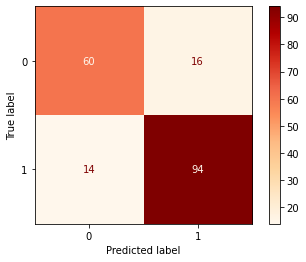

In [29]:
#bagging classifier
bg=BaggingClassifier()
model5=bg.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

bgpred = bg.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bg, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.9509536784741145 
 test accuracy: 0.8967391304347826


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        71
           1       0.94      0.89      0.91       113

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



confusion matrix for gradient boosting classifier


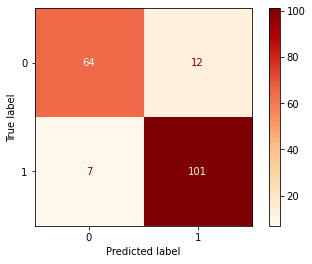

In [30]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model6=gbm.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.8910081743869209 
 test accuracy: 0.8586956521739131


classification report for adaboost classifier
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        72
           1       0.90      0.87      0.88       112

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184



confusion matrix for adaboost classifier


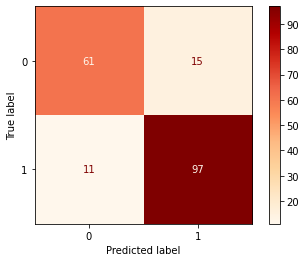

In [31]:
# adaboost classifier 
ada=AdaBoostClassifier()
model7=ada.fit(x_train, y_train)
print("train accuracy:",model7.score(x_train, y_train),"\n","test accuracy:",model7.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

[11:37:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 1.0 
 test accuracy: 0.8804347826086957


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        74
           1       0.91      0.89      0.90       110

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



confusion matrix for extreme gradient boosting classifier


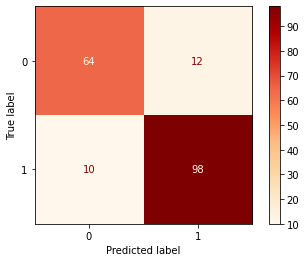

In [32]:
# extreme gradient boost classifier
xgb = XGBClassifier()
model8=xgb.fit(x_train.values, y_train)
print("train accuracy:",model8.score(x_train, y_train),"\n","test accuracy:",model8.score(x_test,y_test))

xgbpred = xgb.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgb, x_test.values, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.8641304347826086


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        73
           1       0.90      0.87      0.89       111

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



confusion matrix for extra tree classifier


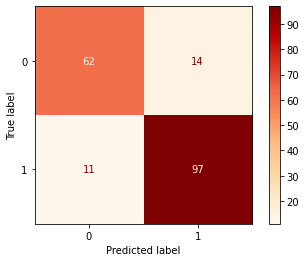

In [33]:
# extra tree classifier
extree = ExtraTreesClassifier()
model9=extree.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),"\n","test accuracy:",model9.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extree, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.9795640326975477 
 test accuracy: 0.907608695652174


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        69
           1       0.95      0.90      0.92       115

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.90       184
weighted avg       0.91      0.91      0.91       184



confusion matrix for voting classifier


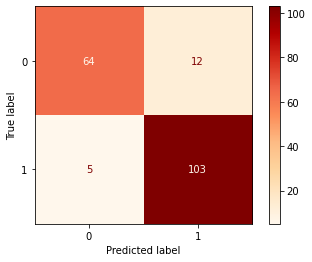

In [34]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()

vc = VotingClassifier(estimators=[('ext', clf1),('gbm', clf2)], voting='soft')
model10=vc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),"\n","test accuracy:",model10.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vc, x_test, y_test ,cmap=plt.cm.OrRd, values_format='d')

train accuracy: 0.9836512261580381 
 test accuracy: 0.9021739130434783


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        70
           1       0.94      0.89      0.92       114

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.91      0.90      0.90       184



confusion matrix for voting classifier


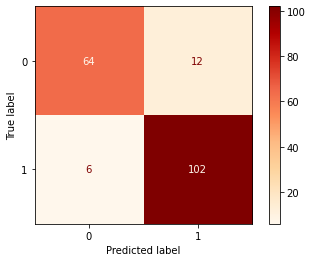

In [35]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('rf', RandomForestClassifier(random_state=5)),('ext', make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=42)))]
sc= StackingClassifier( estimators=estimators)

model11=sc.fit(x_train, y_train)
print("train accuracy:",model11.score(x_train, y_train),"\n","test accuracy:",model11.score(x_test,y_test))

scpred = sc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(sc, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.9754768392370572 
 test accuracy: 0.907608695652174


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        69
           1       0.95      0.90      0.92       115

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.90       184
weighted avg       0.91      0.91      0.91       184



confusion matrix for extra tree classifier


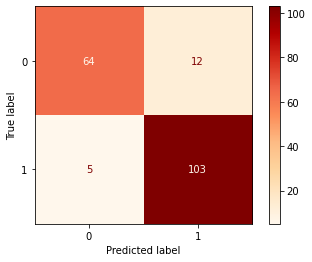

In [36]:
from catboost import CatBoostClassifier

cc = CatBoostClassifier(silent=True )
model12=cc.fit(x_train, y_train)
print("train accuracy:",model12.score(x_train, y_train),"\n","test accuracy:",model12.score(x_test,y_test))

ccpred = cc.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(ccpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(cc, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')


## 💉 Hyper parameter tuning

<font size="4"> From the above fitted models <span style="color:red;">CatBoost classifier</span> has the highest classification accuracy of <span style="color:red;">90.76% </span>. we can improve the accuracy with hyper parameter tuning for these models also. </font>

<center><img src="https://media.giphy.com/media/3o6MboQRbk4w8msepW/giphy.gif" style="width:480px;height:300px;"></center>


<font size="4"> Hyper parameter tuning for catboost classifier </font>

In [37]:
import catboost as cb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
df['Sex'] = np.where(df['Sex'] == "F", 0, 1)
df['ExerciseAngina'] = np.where(df['ExerciseAngina'] == "N", 0, 1)
df=pd.get_dummies(df)
X=df.drop(['HeartDisease'],1)
y=df['HeartDisease']
def hyper_para_tuning(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size=0.2)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cbm = cb.CatBoostClassifier(**param)

    cbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    pred = cbm.predict(valid_x)
    pred_labels = np.rint(pred)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy

In [39]:
hyper_para_vals = optuna.create_study(direction="maximize")
hyper_para_vals.optimize(hyper_para_tuning, n_trials=300, timeout=600)

[I 2021-11-17 11:37:27,928] A new study created in memory with name: no-name-f872092d-e379-462a-9269-32a856eeb58f
[I 2021-11-17 11:37:28,415] Trial 0 finished with value: 0.8532608695652174 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0822105540536375, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.532364507064021}. Best is trial 0 with value: 0.8532608695652174.
[I 2021-11-17 11:37:28,755] Trial 1 finished with value: 0.8913043478260869 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.04481626746458172, 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.9661589347550847}. Best is trial 1 with value: 0.8913043478260869.
[I 2021-11-17 11:37:29,150] Trial 2 finished with value: 0.8967391304347826 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.041636639301785426, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.737325381

In [40]:
print("Number of finished trials: {}".format(len(hyper_para_vals.trials)))

print("Best trial:")
trial = hyper_para_vals.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 300
Best trial:
  Value: 0.9347826086956522
  Params: 
    objective: CrossEntropy
    colsample_bylevel: 0.05857420246935079
    depth: 8
    boosting_type: Plain
    bootstrap_type: Bernoulli
    subsample: 0.5639073331681008


train accuracy: 0.8978201634877384 
 test accuracy: 0.8858695652173914


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        71
           1       0.93      0.88      0.90       113

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



confusion matrix for extra tree classifier


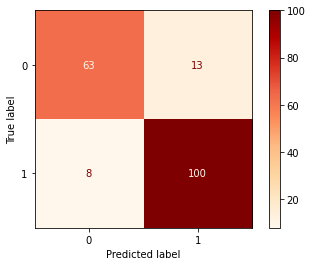

In [41]:
c = CatBoostClassifier(silent=True,objective='Logloss',colsample_bylevel=0.07668035398982363, depth=5, boosting_type='Ordered',bootstrap_type='Bernoulli',subsample=0.994709550179773)
model13=c.fit(x_train, y_train)
print("train accuracy:",model13.score(x_train, y_train),"\n","test accuracy:",model13.score(x_test,y_test))

cpred = c.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(cpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(c, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')


## 💎 Results

<font size="4"> This hyper parameter tuning did not outperform the model with deafault hyper parameters. This may be due to the fact that our hyper parameter space is quite small. more exhaustive search may provide higher performance. </font>

<font size="4"> From the above fitted models <span style="color:red;">CatBoost classifier</span> has the highest classification accuracy of <span style="color:red;">90.76% </span>.

<font size="4"><b>Highly appreciate your questions or feedback related to this notebook.Stay fit and healthy. THANK YOU 😊 </b></font>

<center><img src="https://media.giphy.com/media/MXiWqZBY45qiJ818nX/giphy.gif" style="width:480px;height:280px;"></center>
